In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

%matplotlib inline

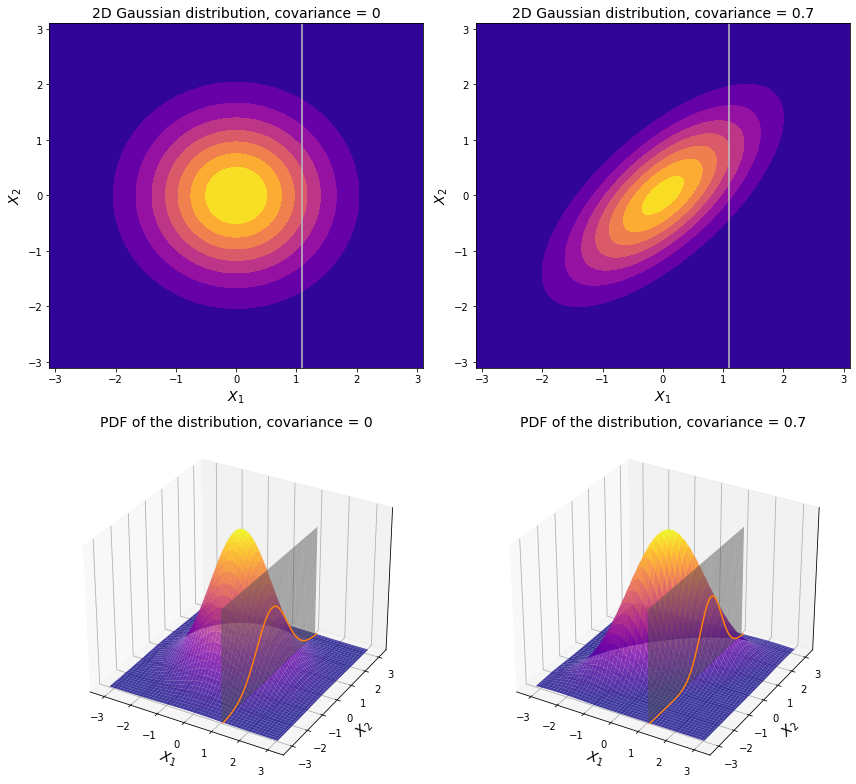

In [124]:
def plot_pdf(fig, subplot, X1, X2, cov):
    
    # 2X2 covariance matrix for the bivariate Gaussian distribution
    cov_matrix = np.array([[1, cov], [cov, 1]])
    distr = multivariate_normal(cov=cov_matrix, mean=[0, 0], seed=12345)
    # generate PDF of the multivariate Gaussian distribution
    pdf = np.zeros(X1.shape)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            pdf[i,j] = distr.pdf([X1[i,j], X2[i,j]])    
    
    ax_contour = fig.add_subplot(subplot)
    ax_contour.contourf(X1, X2, pdf, cmap='plasma')
    ax_contour.plot([1.1, 1.1], [-3.1, 3.1], color='silver')
    ax_contour.set_title(f'2D Gaussian distribution, covariance = {cov}', fontsize=14)
    ax_contour.set_xlabel(R'$X_1$', fontsize=14)
    ax_contour.set_ylabel(R'$X_2$', fontsize=14)
    
    
    ax_pdf = fig.add_subplot(subplot+2, projection = '3d')
    ax_pdf.plot_surface(X1, X2, pdf, cmap='plasma', alpha=0.8, zorder=0)
    
    # create plane
    x1_cut = 1.1
    x2_p = np.linspace(-3.1, 3.1, 100)
    z_p = np.linspace(0, pdf.max()*0.8, 100)
    X2_p, Z_p = np.meshgrid(x2_p, z_p)
    # plot plane
    ax_pdf.plot_surface(x1_cut, X2_p, Z_p, color='silver', alpha=0.5, zorder=5)
                    
    ax_pdf.set_xlabel(R'$X_1$', fontsize=14)
    ax_pdf.set_ylabel(R'$X_2$', fontsize=14)
    ax_pdf.set_title(f'PDF of the distribution, covariance = {cov}', fontsize=14)
    ax_pdf.axes.zaxis.set_ticks([])
    
    # find the closest idx values of X mesh to x1_cut
    tol = 1e-4
    idx_x_p = (np.where(x < x1_cut+tol) and np.where(x > x1_cut-tol))[0][0]
    # Select the corresponding values of X, Y, Z (carefully switch X and Y)
    x1_c, x2_c, z_c = X2[idx_x_p], X1[idx_x_p], pdf[idx_x_p]
    # plot line
    ax_pdf.plot(x1_c, x2_c, z_c, zorder=10)

fig = plt.figure(figsize=(12, 11))

X1, X2 = np.meshgrid(np.linspace(-3.1, 3.1, num=100),
                     np.linspace(-3.1, 3.1, num=100))

plot_pdf(fig, 221, X1, X2, cov=0)
plot_pdf(fig, 222, X1, X2, cov=0.7)

plt.tight_layout()
plt.savefig('../../assets/images/distributions/2d_gaussian_distribution.png', bbox_inches='tight');

In [101]:
np.full((2, 2), 8).max()

8